In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
df = pd.read_csv("dataset_heart_disease.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.shape

(1025, 14)

In [10]:
df.skew

<bound method DataFrame.skew of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [11]:
df.kurt

<bound method DataFrame.kurt of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
df[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]].cov()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,82.306450,-0.431198,-0.672251,43.085733,102.890625,0.392164,-0.635490,-81.446089,0.378144,2.218825,-0.947742,2.539458,0.407093,-1.040392
sex,-0.431198,0.211944,-0.019491,-0.636863,-4.708984,0.004465,-0.013395,-0.522838,0.030288,0.045812,-0.007584,0.053021,0.056697,-0.064346
cp,-0.672251,-0.019491,1.060160,0.688565,-4.336914,0.029108,0.023687,7.268296,-0.195451,-0.211407,0.083727,-0.187017,-0.104385,0.223903
trestbps,43.085733,-0.636863,0.688565,306.835410,115.657227,1.135165,-1.144685,-15.822822,0.506798,3.857971,-1.303344,1.887842,0.644446,-1.215584
chol,102.890625,-4.708984,-4.336914,115.657227,2661.787109,0.495117,-4.014648,-25.841797,1.643555,3.933301,-0.454102,3.949219,3.209961,-2.579102
fbs,0.392164,0.004465,0.029108,1.135165,0.495117,0.127111,-0.019583,-0.072719,0.008303,0.004549,-0.013634,0.050406,-0.009333,-0.007339
restecg,-0.635490,-0.013395,0.023687,-1.144685,-4.014648,-0.019583,0.278655,0.587909,-0.016373,-0.031085,0.028073,-0.042482,-0.006718,0.035496
thalach,-81.446089,-0.522838,7.268296,-15.822822,-25.841797,-0.072719,0.587909,529.263325,-4.136114,-9.456022,5.618078,-4.929917,-1.400290,4.865194
exang,0.378144,0.030288,-0.195451,0.506798,1.643555,0.008303,-0.016373,-4.136114,0.223514,0.172684,-0.078077,0.052558,0.057865,-0.103558
oldpeak,2.218825,0.045812,-0.211407,3.857971,3.933301,0.004549,-0.031085,-9.456022,0.172684,1.380750,-0.417527,0.268673,0.147810,-0.257632


In [14]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


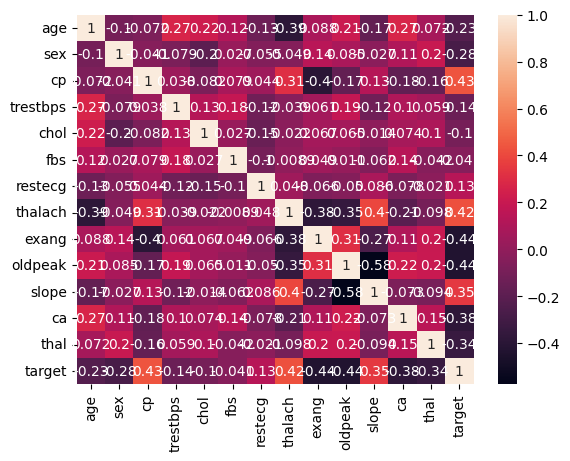

In [19]:
sns.heatmap(df.corr(),annot=True)
plt.show()

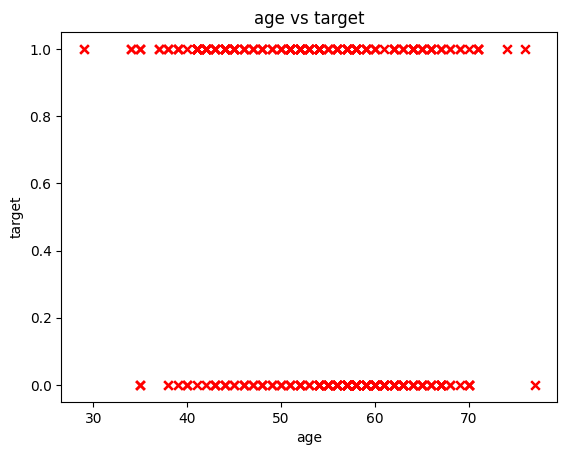

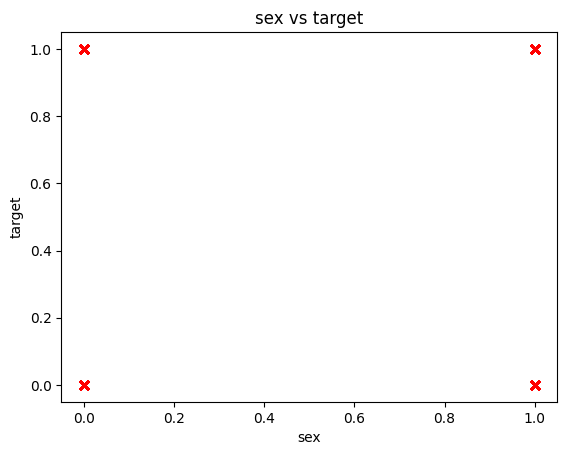

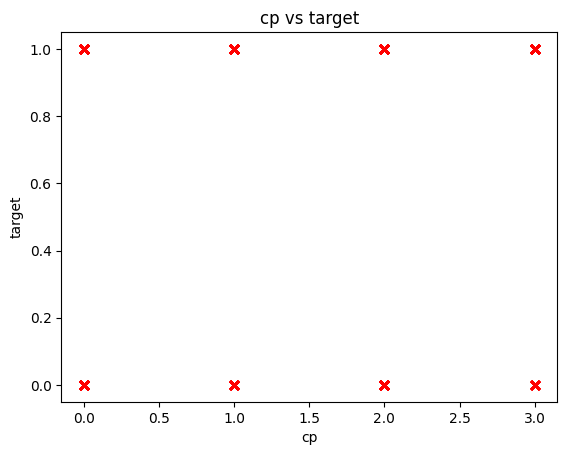

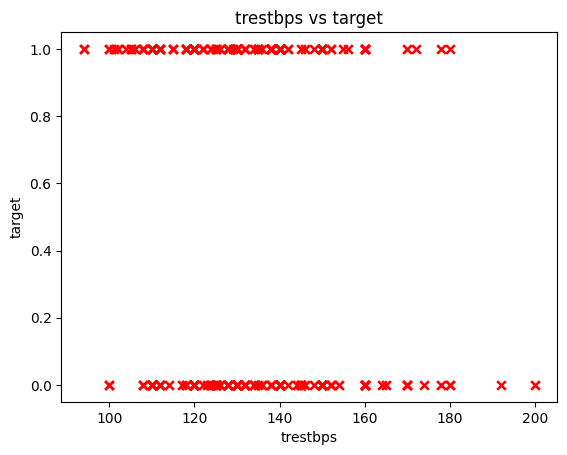

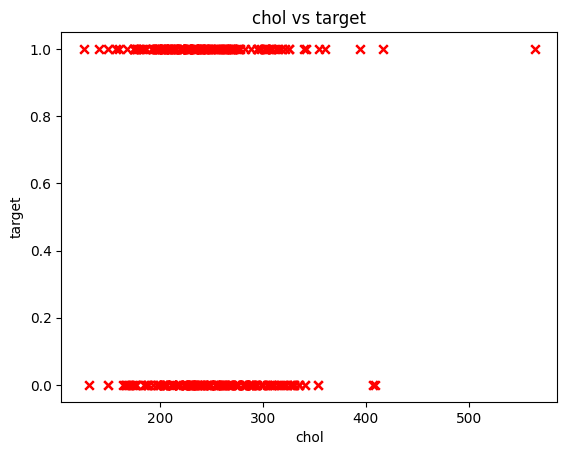

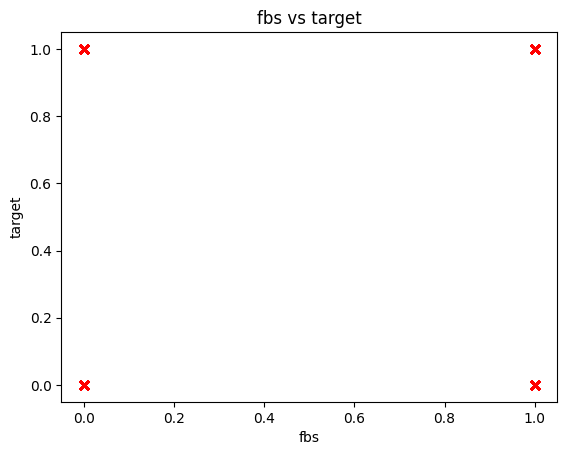

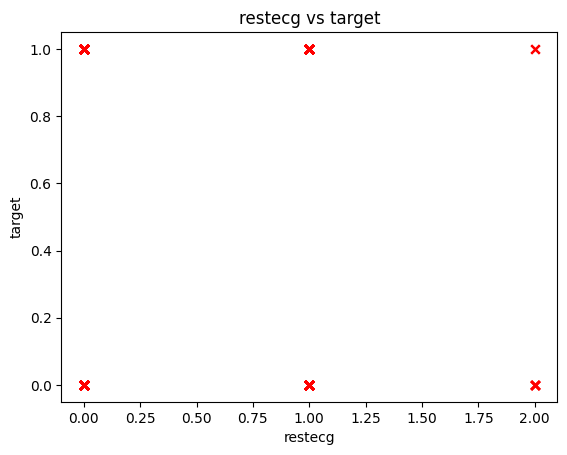

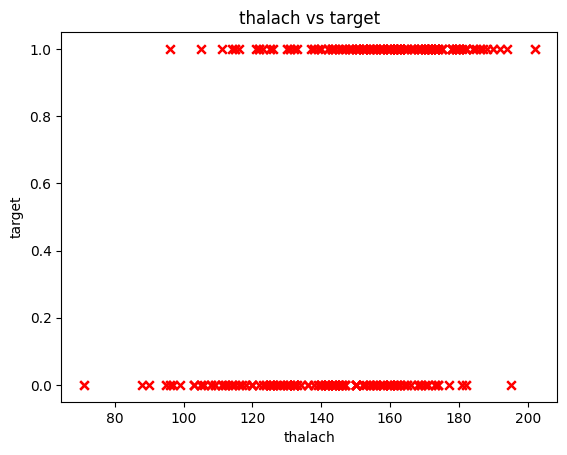

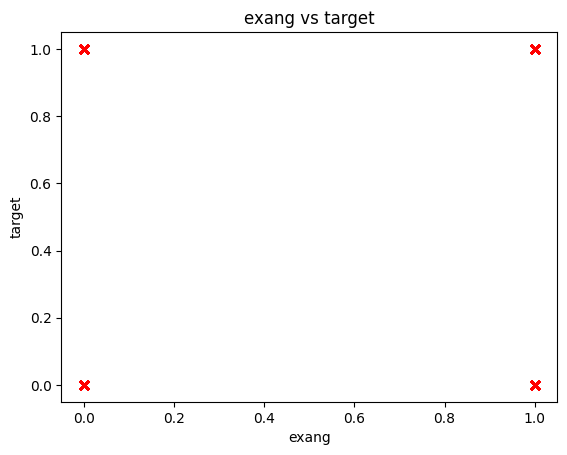

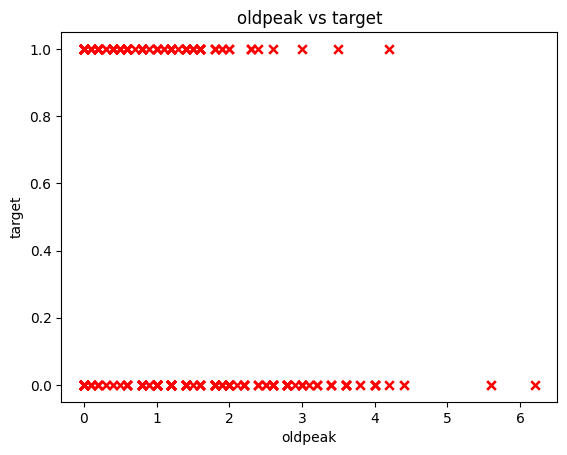

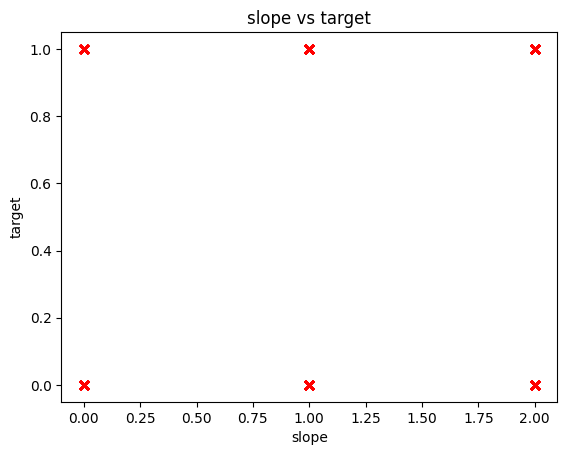

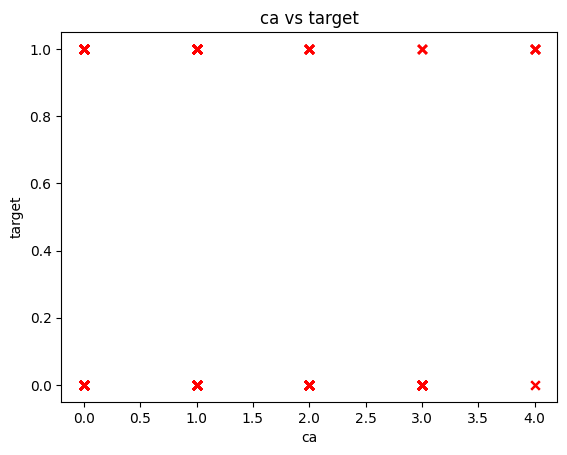

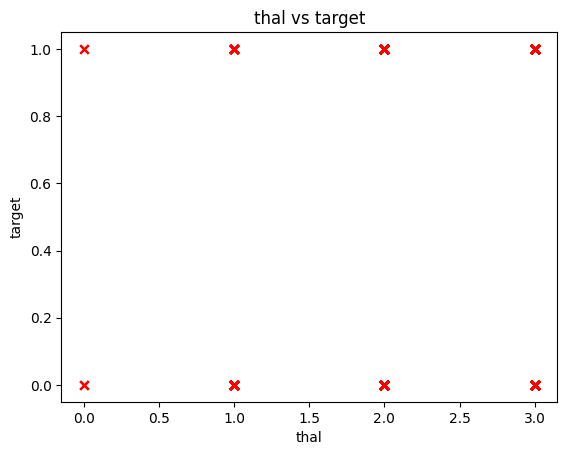

In [28]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
category = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
ctg = ["target"]

for data in category:
    for dt in ctg:
        plt.scatter(df[data], df[dt], marker='x', c='r')
        # Set the title
        plt.title(f"{data} vs {dt}")
        # Set the y-axis label
        plt.ylabel(f'{dt}')
        # Set the x-axis label
        plt.xlabel(f'{data}')
        plt.show()

In [32]:
sum((df["age"]<50) & (df["target"]==1))

199

In [49]:
sum((df["age"]>50) & (df["target"]==1))

315

In [47]:
df.loc[df["target"] == 1, "age"].min()

np.int64(29)

In [48]:
df.loc[df["target"] == 1, "age"].max()

np.int64(76)

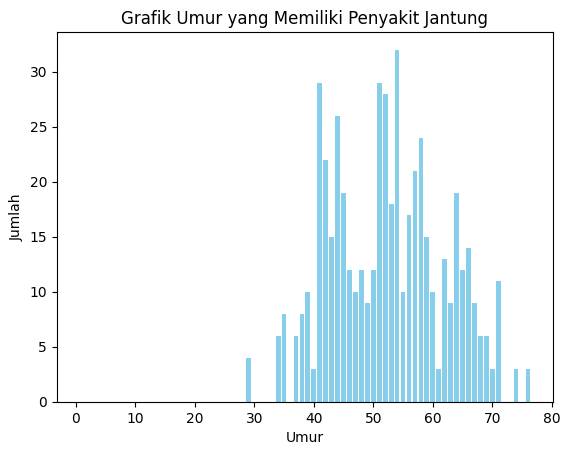

In [60]:
# Menghitung jumlah individu berdasarkan umur dengan target == 1 (memiliki penyakit jantung)
age_counts = df[df["target"] == 1]["age"].value_counts().sort_index()

age_range = np.arange(1, df["age"].max())

age_counts = age_counts.reindex(age_range, fill_value=0)

# Membuat bar chart
plt.bar(age_counts.index, age_counts.values, color="skyblue")

# Menambahkan judul dan label
plt.title("Grafik Umur yang Memiliki Penyakit Jantung")
plt.xlabel("Umur")
plt.ylabel("Jumlah")

# Menampilkan grafik
plt.show()


In [64]:
X = df.drop("target", axis=1)
y = df["target"]

In [66]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [67]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43, stratify=y)

In [69]:
# Standardisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
# 3. Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
# 4. Evaluasi Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi Model: 0.8390

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82       100
           1       0.79      0.93      0.86       105

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



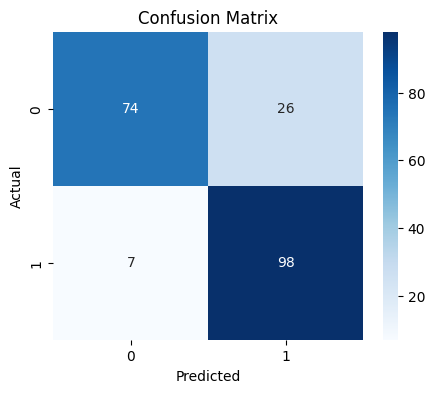

In [72]:
# 5. Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

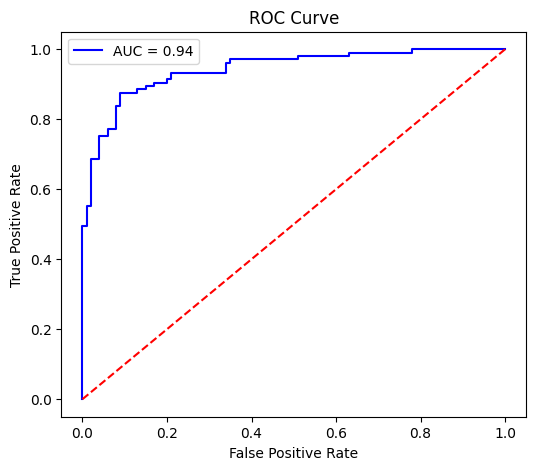

In [73]:
# 6. ROC Curve
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [78]:
akurasi = model.score(X_test, y_test)
print(f"Akurasi modelnya sebesar : {akurasi}")

Akurasi modelnya sebesar : 0.8390243902439024


In [117]:
import pickle

# Menyimpan model menggunakan pickle
with open('model_heart_disease.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
    

In [116]:
# Mengambil input dari pengguna
# age = int(input("Masukkan umur kamu = "))
# sex = int(input("Masukkan jenis kelamin kamu (1 = laki-laki / 0 = perempuan) = "))
# cp = int(input("Masukkan jenis nyeri dada kamu (0-3) = "))
# trestbps = int(input("Masukkan tekanan darah istirahat kamu = "))
# chol = int(input("Masukkan kadar kolesterol kamu = "))
# fbs = int(input("Masukkan gula darah puasa kamu (1 = tinggi / 0 = normal) = "))
# restecg = int(input("Masukkan hasil elektrokardiografi kamu (0 = normal / 1 = ST-tach / 2 = hipertropik) = "))
# thalach = int(input("Masukkan denyut jantung maksimum kamu = "))
# exang = int(input("Masukkan nyeri dada akibat olahraga kamu (1 = ya / 0 = tidak) = "))
# oldpeak = float(input("Masukkan depresi ST akibat olahraga kamu = "))
# slope = int(input("Masukkan slope kamu (0 = naik / 1 = datar / 2 = turun) = "))
# ca = int(input("Masukkan jumlah pembuluh darah yang terlihat (0-3) = "))
# thal = int(input("Masukkan thal kamu (1 = normal / 2 = fixed defect / 3 = reversable defect) = "))

# data_input = np.array([[]])
# # data_input = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

# # Melakukan prediksi dengan model
# prediksi = model.predict(data_input)

# # Menampilkan hasil prediksi
# print(f"Hasil prediksi: {prediksi[0]}")

# # Menampilkan hasil dalam bentuk yang lebih jelas (misalnya, 1 = ada penyakit jantung, 0 = tidak ada)
# if prediksi == 1:
#     print("Deteksi: Ada penyakit jantung")
# else:
#     print("Deteksi: Tidak ada penyakit jantung")
# 51, 0, 2, 130, 256, 0, 0, 149, 0, 0.5, 2, 0, 2, 1
# Menyiapkan data input untuk prediksi
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib


# Memuat scaler yang telah digunakan untuk pelatihan
scaler = scaler

# Memuat model yang sudah dilatih
model = joblib.load('model_heart_disease.pkl')

# Membuat Data Input untuk dilakukan prediksi
data_input = np.array([
    [58, 1, 2, 140, 211, 1, 0, 165, 0, 0, 2, 0, 2],
    [60, 1, 2, 140, 185, 0, 0, 155, 0, 3, 1, 0, 2],
    [67, 0, 0, 106, 223, 0, 1, 142, 0, 0.3, 2, 2, 2],
    [45, 1, 0, 104, 208, 0, 0, 148, 1, 3, 1, 0, 2],
    [63, 0, 2, 135, 252, 0, 0, 172, 0, 0, 2, 0, 2],
    [42, 0, 2, 120, 209, 0, 1, 173, 0, 0, 1, 0, 2],
    [61, 0, 0, 145, 307, 0, 0, 146, 1, 1, 1, 0, 3],
    [44, 1, 2, 130, 233, 0, 1, 179, 1, 0.4, 2, 0, 2],
    [58, 0, 1, 136, 319, 1, 0, 152, 0, 0, 2, 2, 2],
    [56, 1, 2, 130, 256, 1, 0, 142, 1, 0.6, 1, 1, 1],
    [55, 0, 0, 180, 327, 0, 2, 117, 1, 3.4, 1, 0, 2],
    [44, 1, 0, 120, 169, 0, 1, 144, 1, 2.8, 0, 0, 1],
    [50, 0, 1, 120, 244, 0, 1, 162, 0, 1.1, 2, 0, 2],
    [57, 1, 0, 130, 131, 0, 1, 115, 1, 1.2, 1, 1, 3],
    [70, 1, 2, 160, 269, 0, 1, 112, 1, 2.9, 1, 1, 3],
    [50, 1, 2, 129, 196, 0, 1, 163, 0, 0, 2, 0, 2],
    [46, 1, 2, 150, 231, 0, 1, 147, 0, 3.6, 1, 0, 2],
    [51, 1, 3, 125, 213, 0, 0, 125, 1, 1.4, 2, 1, 2],
    [59, 1, 0, 138, 271, 0, 0, 182, 0, 0, 2, 0, 2],
    [64, 1, 0, 128, 263, 0, 1, 105, 1, 0.2, 1, 1, 3],
    [57, 1, 2, 128, 229, 0, 0, 150, 0, 0.4, 1, 1, 3],
    [65, 0, 2, 160, 360, 0, 0, 151, 0, 0.8, 2, 0, 2],
    [54, 1, 2, 120, 258, 0, 0, 147, 0, 0.4, 1, 0, 3],
    [61, 0, 0, 130, 330, 0, 0, 169, 0, 0, 2, 0, 2],
    [46, 1, 0, 120, 249, 0, 0, 144, 0, 0.8, 2, 0, 3],
    [55, 0, 1, 132, 342, 0, 1, 166, 0, 1.2, 2, 0, 2],
    [42, 1, 0, 140, 226, 0, 1, 178, 0, 0, 2, 0, 2],
    [41, 1, 1, 135, 203, 0, 1, 132, 0, 0, 1, 0, 1],
    [66, 0, 0, 178, 228, 1, 1, 165, 1, 1, 1, 2, 3],
    [66, 0, 2, 146, 278, 0, 0, 152, 0, 0, 1, 1, 2]
])

# Menormalisasi data input menggunakan scaler yang sama
data_input_normalized = scaler.transform(data_input)

# Melakukan prediksi dengan data input yang sudah dinormalisasi
predictions = model.predict(data_input_normalized)

# Menampilkan hasil prediksi
for i, pred in enumerate(predictions):
    print(f"Data ke-{i+1} Hasil prediksi: {pred}")
    if pred == 1:
        print("Deteksi: Ada penyakit jantung")
    else:
        print("Deteksi: Tidak ada penyakit jantung")

Data ke-1 Hasil prediksi: 1
Deteksi: Ada penyakit jantung
Data ke-2 Hasil prediksi: 1
Deteksi: Ada penyakit jantung
Data ke-3 Hasil prediksi: 1
Deteksi: Ada penyakit jantung
Data ke-4 Hasil prediksi: 0
Deteksi: Tidak ada penyakit jantung
Data ke-5 Hasil prediksi: 1
Deteksi: Ada penyakit jantung
Data ke-6 Hasil prediksi: 1
Deteksi: Ada penyakit jantung
Data ke-7 Hasil prediksi: 0
Deteksi: Tidak ada penyakit jantung
Data ke-8 Hasil prediksi: 1
Deteksi: Ada penyakit jantung
Data ke-9 Hasil prediksi: 1
Deteksi: Ada penyakit jantung
Data ke-10 Hasil prediksi: 1
Deteksi: Ada penyakit jantung
Data ke-11 Hasil prediksi: 0
Deteksi: Tidak ada penyakit jantung
Data ke-12 Hasil prediksi: 0
Deteksi: Tidak ada penyakit jantung
Data ke-13 Hasil prediksi: 1
Deteksi: Ada penyakit jantung
Data ke-14 Hasil prediksi: 0
Deteksi: Tidak ada penyakit jantung
Data ke-15 Hasil prediksi: 0
Deteksi: Tidak ada penyakit jantung
Data ke-16 Hasil prediksi: 1
Deteksi: Ada penyakit jantung
Data ke-17 Hasil prediksi: 0


C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
